# Spam/Fake News Detection Classifier
## Using Naive Bayes Classifier to classify news as Spam (Fake) or Legitimate (True)

In [ ]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

print("Core libraries imported successfully!")

Core libraries imported successfully!


## Data Loading & Exploration

In [ ]:
# Mounting Google Drive to access datasets
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading True and Fake News Datasets
True_news_path = '/content/drive/MyDrive/Colab Notebooks/True.csv'
Fake_news_path = '/content/drive/MyDrive/Colab Notebooks/Fake.csv'

# Read CSV files
True_news = pd.read_csv(True_news_path)
Fake_news = pd.read_csv(Fake_news_path)

# Assign labels: 0 = True News, 1 = Fake News
True_news['label'] = 0
Fake_news['label'] = 1

print(f"True News Records: {len(True_news):,}")
print(f"Fake News Records: {len(Fake_news):,}")

True News Records: 21,417
Fake News Records: 23,481


In [ ]:
# Sample of True News Data
print("True News Sample:")
True_news.head()

True News Sample:


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
# Sample of Fake News Data
print("Fake News Sample:")
Fake_news.head()

Fake News Sample:


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
# Combining both datasets into a single DataFrame
dataset1 = True_news[['text', 'label']]
dataset2 = Fake_news[['text', 'label']]

dataset = pd.concat([dataset1, dataset2], ignore_index=True)

print(f"Combined Dataset Size: {len(dataset):,} records")
print(f"Dataset Shape: {dataset.shape}")

Combined Dataset Size: 44,898 records
Dataset Shape: (44898, 2)


## Data Quality Analysis

In [ ]:
# Checking for Missing Values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)
print(f"\nNo missing values detected!" if missing_values.sum() == 0 else "Missing values found!")

Missing Values:
text     0
label    0
dtype: int64

No missing values detected!


In [ ]:
# Class Distribution Analysis
class_distribution = dataset['label'].value_counts().sort_index()
print("\nClass Distribution:")
print(f"  Legitimate News (0): {class_distribution[0]:,} records")
print(f"  Fake News (1):       {class_distribution[1]:,} records")
print(f"\nClass Balance:")
print(f"  Legitimate: {class_distribution[0]/len(dataset)*100:.2f}%")
print(f"  Fake:       {class_distribution[1]/len(dataset)*100:.2f}%")


Class Distribution:
  Legitimate News (0): 21,417 records
  Fake News (1):       23,481 records

Class Balance:
  Legitimate: 47.70%
  Fake:       52.30%


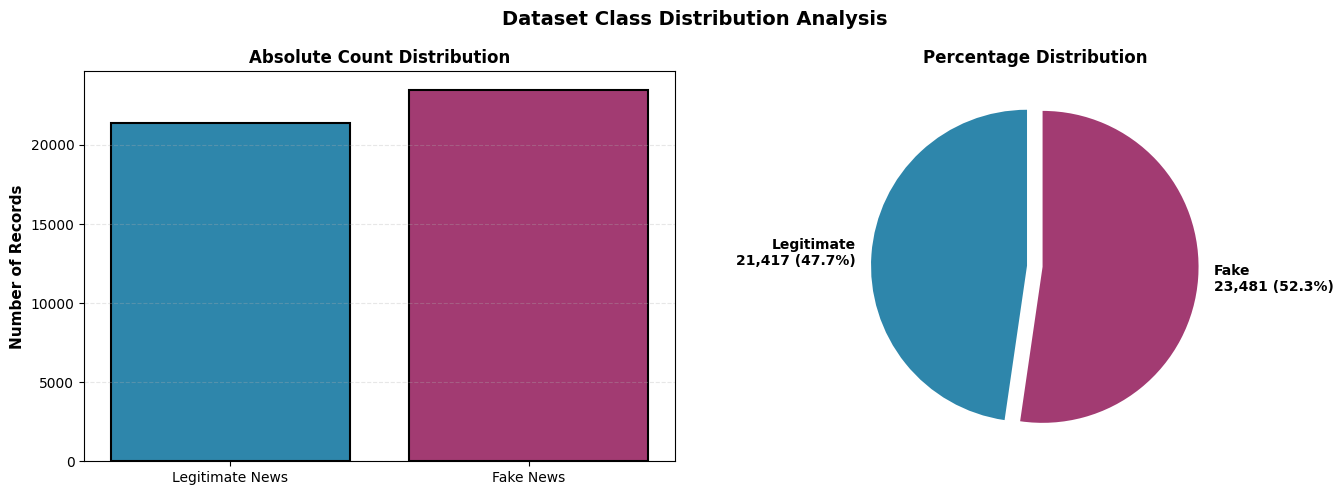

Data distribution visualization completed.


In [ ]:
# Professional Data Distribution Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Dataset Class Distribution Analysis', fontsize=14, fontweight='bold')

label_counts = dataset['label'].value_counts().sort_index()
colors = ['#2E86AB', '#A23B72']
axes[0].bar(['Legitimate News', 'Fake News'], label_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Number of Records', fontsize=11, fontweight='bold')
axes[0].set_title('Absolute Count Distribution', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

sizes = label_counts.values
labels = [f'Legitimate\n{sizes[0]:,} ({sizes[0]/sum(sizes)*100:.1f}%)',
          f'Fake\n{sizes[1]:,} ({sizes[1]/sum(sizes)*100:.1f}%)']
axes[1].pie(sizes, labels=labels, colors=colors, autopct='', startangle=90,
            explode=(0.05, 0.05), textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_title('Percentage Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
print('Data distribution visualization completed.')


In [ ]:
# Shuffle dataset for better training generalization
dataset = dataset.sample(frac=1).reset_index(drop=True)

print(f"Dataset shuffled successfully!")
print(f"Final shape: {dataset.shape}")
print(f"\nFirst few records after shuffling:")
dataset.head()

Dataset shuffled successfully!
Final shape: (44898, 2)

First few records after shuffling:


,text,label
0,THIS WAS A VERY AWKWARD MOMENT BUT THE BEST PA...,1
1,"These are people who claim to love diversity,...",1
2,,1
3,Stealing Jobs From Minorities To Satisfy White...,1
4,VATICAN CITY (Reuters) - If you ever wondered ...,0


## Natural Language Processing (NLP)
### Text Cleaning & Preprocessing Pipeline

In [ ]:
# Importing NLP Libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download required NLTK data
nltk.download('stopwords')

print("NLP libraries imported successfully!")

NLP libraries imported successfully!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Define Comprehensive Text Cleaning Function
def clean_row(row):
    """
    Cleans and preprocesses text data:
    - Convert to lowercase
    - Remove special characters and digits
    - Remove extra whitespace
    - Remove stopwords
    - Apply stemming
    """
    # Convert to lowercase
    row = row.lower()

    # Remove special characters and digits
    row = re.sub('[^a-zA-Z]', ' ', row)

    # Remove extra whitespace
    row = re.sub(r'\\s+', ' ', row).strip()

    # Tokenize
    tokens = row.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

print("Cleaning function defined!")

Cleaning function defined!


In [ ]:
# Sample Text Before Cleaning
print("BEFORE CLEANING (Sample):")
print("-" * 80)
print(dataset['text'].iloc[0][:300])
print("\n" + "-" * 80)

BEFORE CLEANING (Sample):
--------------------------------------------------------------------------------
THIS WAS A VERY AWKWARD MOMENT BUT THE BEST PART IS WHEN RAND PAUL CALLS OUT CHRISTIE FOR HUGGING OBAMA: 

--------------------------------------------------------------------------------


In [ ]:
# Apply Cleaning Function to All Text Data
print("Processing text data (this may take a moment)...")
dataset['text'] = dataset['text'].apply(lambda x: clean_row(x))
print("Text cleaning completed!")

Processing text data (this may take a moment)...
Text cleaning completed!


In [ ]:
# Sample Text After Cleaning
print("AFTER CLEANING (Sample):")
print("-" * 80)
print(dataset['text'].iloc[0][:300])
print("\n" + "-" * 80)
print(f"\nCleaned dataset shape: {dataset.shape}")
print(f"\nFirst few cleaned records:")
dataset.head()

AFTER CLEANING (Sample):
--------------------------------------------------------------------------------
awkward moment best part rand paul call christi hug obama

--------------------------------------------------------------------------------

Cleaned dataset shape: (44898, 2)

First few cleaned records:


,text,label
0,awkward moment best part rand paul call christ...,1
1,peopl claim love divers love divers want peopl...,1
2,,1
3,steal job minor satisfi white environmentalist...,1
4,vatican citi reuter ever wonder say fake news ...,0


## Feature Extraction & Vectorization
### Converting text to numerical features using TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
# Importing Vectorization Libraries
from sklearn.feature_extraction.text import TfidfVectorizer

print("TF-IDF vectorizer imported successfully!")

TF-IDF vectorizer imported successfully!


In [ ]:
# Apply TF-IDF Vectorization
# Using top 50,000 features
vectorizer = TfidfVectorizer(max_features=50000, lowercase=False, ngram_range=(1,2))
X = vectorizer.fit_transform(dataset['text'])
y = dataset['label']

print(f"TF-IDF Vectorization Complete!")
print(f"Feature Matrix Shape: {X.shape}")
print(f"   - Samples: {X.shape[0]:,}")
print(f"   - Features: {X.shape[1]:,}")
print(f"   - Sparsity: {(1 - X.nnz / (X.shape[0] * X.shape[1])) * 100:.2f}%")

TF-IDF Vectorization Complete!
Feature Matrix Shape: (44898, 50000)
   - Samples: 44,898
   - Features: 50,000
   - Sparsity: 99.58%


## Train-Test Split

In [ ]:
# Import and Apply Train-Test Split
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

print(f"Train-Test Split Complete!")
print(f"\nTraining Set:")
print(f"   - Samples: {X_train.shape[0]:,}")
print(f"   - Legitimate: {sum(y_train == 0):,}")
print(f"   - Fake: {sum(y_train == 1):,}")
print(f"\nTesting Set:")
print(f"   - Samples: {X_test.shape[0]:,}")
print(f"   - Legitimate: {sum(y_test == 0):,}")
print(f"   - Fake: {sum(y_test == 1):,}")

Train-Test Split Complete!

Training Set:
   - Samples: 35,918
   - Legitimate: 17,133
   - Fake: 18,785

Testing Set:
   - Samples: 8,980
   - Legitimate: 4,284
   - Fake: 4,696


## Model Training
### Multinomial Naive Bayes Classifier

In [ ]:
# Import Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

print("Naive Bayes classifier imported successfully!")

Naive Bayes classifier imported successfully!


In [ ]:
# Train Multinomial Naive Bayes Model
model = MultinomialNB()
print("Training model...")
model.fit(X_train, y_train)
print("\nModel training completed!")
print(f"Model parameters: {model}")

Training model...

Model training completed!
Model parameters: MultinomialNB()


## Model Evaluation & Performance Metrics

In [ ]:
# Make Predictions on Test Set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Predictions generated for both training and testing sets!")

Predictions generated for both training and testing sets!


In [ ]:
# Calculate Accuracy Scores
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Accuracy Scores:")
print(f"\nTraining Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy:  {test_accuracy*100:.2f}%")

Accuracy Scores:

Training Accuracy: 95.82%
Testing Accuracy:  95.28%


In [ ]:
# Detailed Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("\n" + "="*60)
print("CLASSIFICATION REPORT (Test Set)")
print("="*60)
print(classification_report(y_test, y_pred_test,
                          target_names=['Legitimate (0)', 'Fake (1)']))


CLASSIFICATION REPORT (Test Set)
                precision    recall  f1-score   support

Legitimate (0)       0.96      0.94      0.95      4284
      Fake (1)       0.95      0.96      0.96      4696

      accuracy                           0.95      8980
     macro avg       0.95      0.95      0.95      8980
  weighted avg       0.95      0.95      0.95      8980



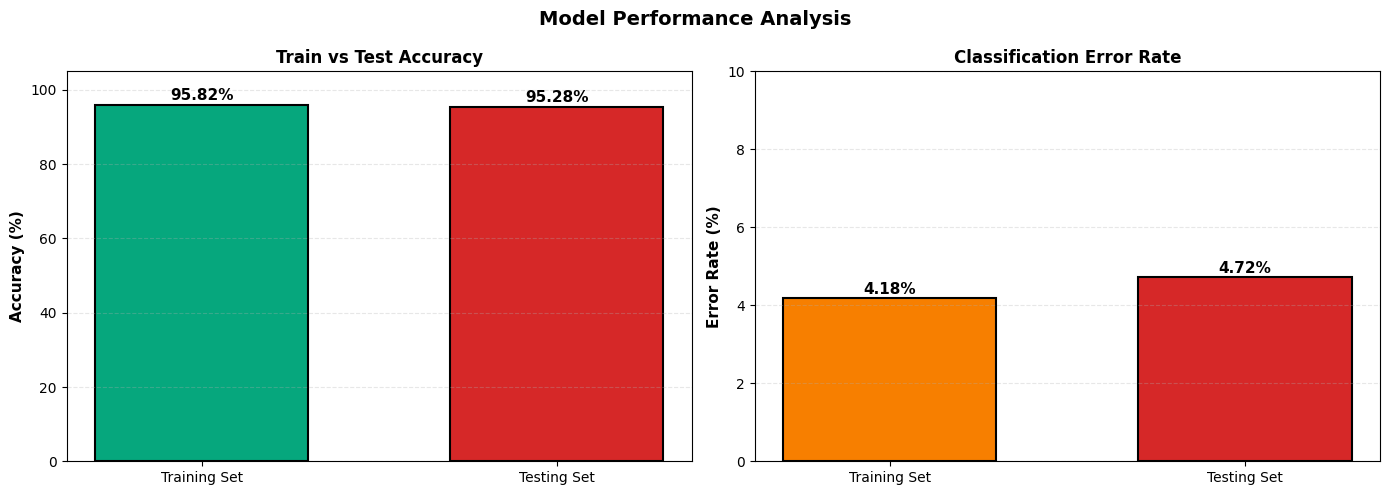

Model performance visualization completed.


In [ ]:
# Professional Model Performance Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Model Performance Analysis', fontsize=14, fontweight='bold')

accuracies = [train_accuracy * 100, test_accuracy * 100]
dataset_labels = ['Training Set', 'Testing Set']
colors_acc = ['#06A77D', '#D62828']
bars = axes[0].bar(dataset_labels, accuracies, color=colors_acc, edgecolor='black', linewidth=1.5, width=0.6)
axes[0].set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
axes[0].set_title('Train vs Test Accuracy', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 105])
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 1.5,
                f'{accuracies[i]:.2f}%', ha='center', fontweight='bold', fontsize=11)

error_rates = [(1 - train_accuracy) * 100, (1 - test_accuracy) * 100]
bars2 = axes[1].bar(dataset_labels, error_rates, color=['#F77F00', '#D62828'], edgecolor='black', linewidth=1.5, width=0.6)
axes[1].set_ylabel('Error Rate (%)', fontsize=11, fontweight='bold')
axes[1].set_title('Classification Error Rate', fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 10])
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{error_rates[i]:.2f}%', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()
print('Model performance visualization completed.')


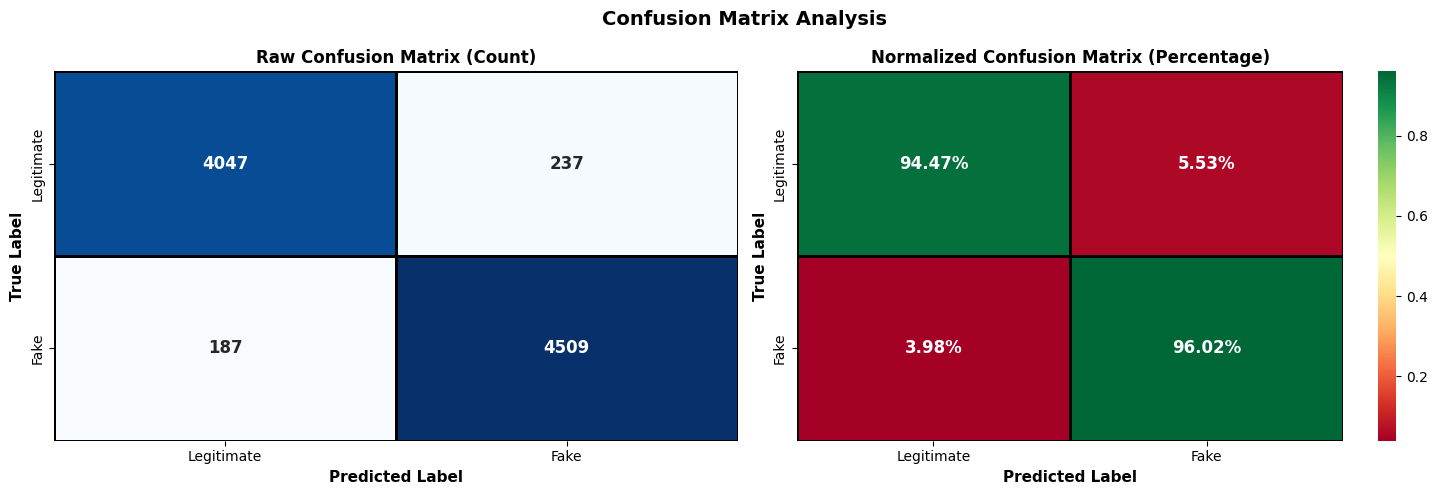

Confusion Matrix Breakdown:
  True Negatives (TN):  4,047
  False Positives (FP): 237
  False Negatives (FN): 187
  True Positives (TP):  4,509


In [ ]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Confusion Matrix Analysis', fontsize=14, fontweight='bold')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Fake'], yticklabels=['Legitimate', 'Fake'],
            ax=axes[0], annot_kws={'size': 12, 'weight': 'bold'}, linewidths=2, linecolor='black')
axes[0].set_ylabel('True Label', fontsize=11, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
axes[0].set_title('Raw Confusion Matrix (Count)', fontsize=12, fontweight='bold')

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='RdYlGn', cbar=True,
            xticklabels=['Legitimate', 'Fake'], yticklabels=['Legitimate', 'Fake'],
            ax=axes[1], annot_kws={'size': 12, 'weight': 'bold'}, linewidths=2, linecolor='black')
axes[1].set_ylabel('True Label', fontsize=11, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
axes[1].set_title('Normalized Confusion Matrix (Percentage)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print('Confusion Matrix Breakdown:')
print(f'  True Negatives (TN):  {tn:,}')
print(f'  False Positives (FP): {fp:,}')
print(f'  False Negatives (FN): {fn:,}')
print(f'  True Positives (TP):  {tp:,}')


## Model Summary & Results

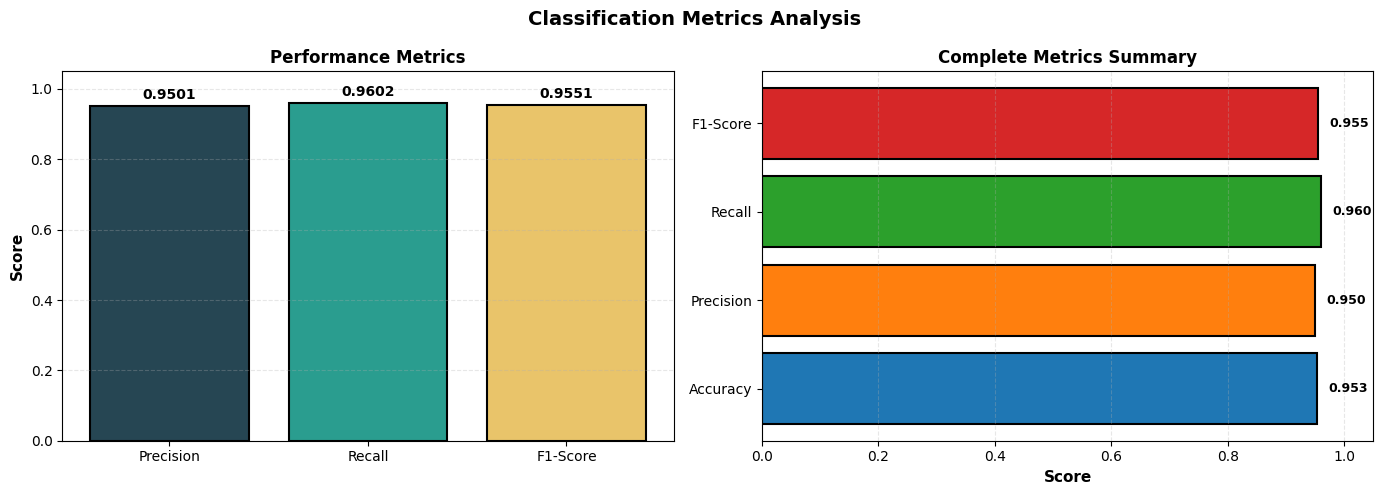

Classification metrics visualization completed.


In [ ]:
# Classification Metrics Visualization
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

metrics_names = ['Precision', 'Recall', 'F1-Score']
metrics_values = [precision, recall, f1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Classification Metrics Analysis', fontsize=14, fontweight='bold')

colors_metrics = ['#264653', '#2A9D8F', '#E9C46A']
bars = axes[0].bar(metrics_names, metrics_values, color=colors_metrics, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Score', fontsize=11, fontweight='bold')
axes[0].set_title('Performance Metrics', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 1.05])
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{value:.4f}', ha='center', fontweight='bold', fontsize=10)

all_metrics = {'Accuracy': accuracy_score(y_test, y_pred_test), 'Precision': precision,
               'Recall': recall, 'F1-Score': f1}
metric_labels = list(all_metrics.keys())
metric_vals = list(all_metrics.values())

colors_all = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars2 = axes[1].barh(metric_labels, metric_vals, color=colors_all, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Score', fontsize=11, fontweight='bold')
axes[1].set_title('Complete Metrics Summary', fontsize=12, fontweight='bold')
axes[1].set_xlim([0, 1.05])
axes[1].grid(axis='x', alpha=0.3, linestyle='--')
for bar, value in zip(bars2, metric_vals):
    width = bar.get_width()
    axes[1].text(width + 0.02, bar.get_y() + bar.get_height()/2.,
                f'{value:.3f}', ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()
print('Classification metrics visualization completed.')


In [ ]:
# Final Summary Statistics
print("\n" + "="*80)
print("SPAM/FAKE NEWS DETECTION - FINAL SUMMARY")
print("="*80)
print(f"\nModel Performance:")
print(f"   Training Accuracy:  {train_accuracy*100:.2f}%")
print(f"   Testing Accuracy:   {test_accuracy*100:.2f}%")
print(f"\nDataset Information:")
print(f"   - Total Samples:      {len(dataset):,}")
print(f"   - Training Samples:   {len(y_train):,}")
print(f"   - Testing Samples:    {len(y_test):,}")
print(f"   - Features Extracted: {X.shape[1]:,}")
print(f"\nClassifier Used: Multinomial Naive Bayes")
print("="*80)


SPAM/FAKE NEWS DETECTION - FINAL SUMMARY

Model Performance:
   Training Accuracy:  95.82%
   Testing Accuracy:   95.28%

Dataset Information:
   - Total Samples:      44,898
   - Training Samples:   35,918
   - Testing Samples:    8,980
   - Features Extracted: 50,000

Classifier Used: Multinomial Naive Bayes
